In [39]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# bucket = "project1-jumplus"
file1 = "players_20.csv"
# s3_client.download_file(bucket, file1, file1)

In [41]:
#1.Load the csv file and show top 5 records from it
df = pd.read_csv(file1)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [42]:
#2. How you would be able to see each column's name.
print(df.columns.tolist())

# for col in df.columns:
#   print(col)
# df["body_type"].unique()

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [43]:
#3. Need to show number of rows and columns of this dataset
print("number of rows: ", len(df))
print("number of columns: ", len(df.columns))
df.shape

number of rows:  18278
number of columns:  104


(18278, 104)

In [44]:
#4. Show number of players and their countries.
# Groupby multiple columns
result = df.groupby(['nationality']).agg(numOfPlayers=('short_name', 'count'))
result

,numOfPlayers
nationality,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
...,...
Venezuela,66
Vietnam,1
Wales,117


In [45]:
# 5. If you find many records in point 4 then show only top 10 countries and their number of players.
top10 = result['numOfPlayers'].nlargest(n=10)
top10 = top10.to_frame().reset_index()
top10

,nationality,numOfPlayers
0,England,1667
1,Germany,1216
2,Spain,1035
3,France,984
4,Argentina,886
5,Brazil,824
6,Italy,732
7,Colombia,591
8,Japan,453
9,Netherlands,416


Text(0, 0.5, 'Number Of Players')

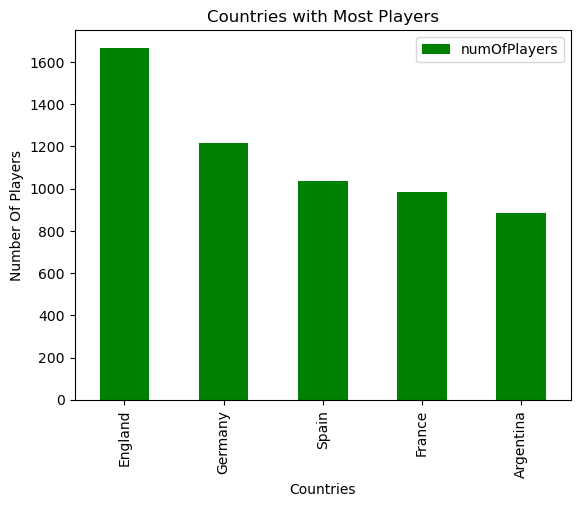

In [46]:
#6. Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars.
#create bar plot with custom aesthetics
top5 = top10.sort_values(by="numOfPlayers", ascending=0)[:5]
top5.plot.bar(x='nationality', y='numOfPlayers', color="green")

plt.title("Countries with Most Players")
plt.xlabel("Countries")
plt.ylabel("Number Of Players")

In [47]:
#7. Show top 5 players short name and wages.
top5_wages = df.nlargest(5, 'wage_eur')
top5_wages = top5_wages[["short_name","wage_eur"]]
top5_wages.reset_index(drop=True)

,short_name,wage_eur
0,L. Messi,565000
1,E. Hazard,470000
2,Cristiano Ronaldo,405000
3,K. De Bruyne,370000
4,A. Griezmann,370000


In [48]:
#8. Show top 5 players short name and wages that are getting highest salaries.

top5_salary = df.nlargest(5, 'value_eur')
top5_salary = top5_salary[["short_name","wage_eur", 'value_eur']]
top5_salary.reset_index(drop=True, inplace=True)

top5_salary

,short_name,wage_eur,value_eur
0,Neymar Jr,290000,105500000
1,L. Messi,565000,95500000
2,K. Mbappé,155000,93500000
3,E. Hazard,470000,90000000
4,K. De Bruyne,370000,90000000


Text(0, 0.5, 'Euro Pound')

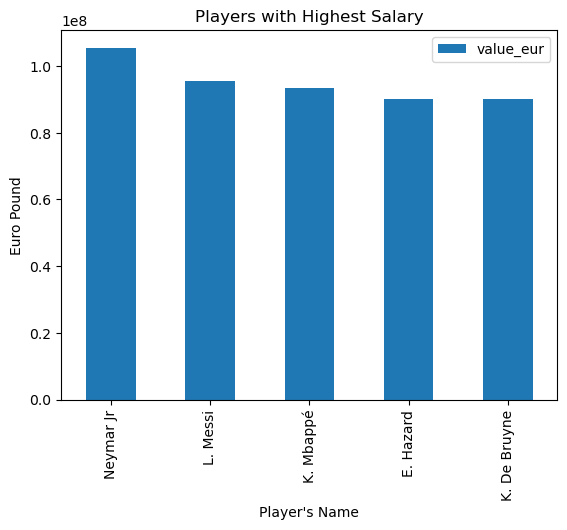

In [49]:
#9.Create a bar plot of point number 8
top5_salary.plot.bar(x='short_name', y='value_eur')
plt.title("Players with Highest Salary")
plt.xlabel("Player's Name")
plt.ylabel("Euro Pound")


#Germany(10-12)

In [50]:
#filtering the country name
def germany(col, other_cols):
  germany = df[df.nationality == "Germany"]
  germany_top10 = germany.nlargest(10,[f"{col}"])
  
  germany_top10 = germany_top10.reset_index(drop=True)
  other_cols.insert(0,"short_name")
  return germany_top10[other_cols]

In [51]:
#10.Show top 10 records of Germany. #overall
germany("overall",["overall", "nationality"])

,short_name,overall,nationality
0,M. ter Stegen,90,Germany
1,M. Neuer,88,Germany
2,T. Kroos,88,Germany
3,M. Reus,88,Germany
4,M. Hummels,87,Germany
5,L. Sané,86,Germany
6,J. Kimmich,86,Germany
7,T. Müller,86,Germany
8,N. Süle,85,Germany
9,K. Havertz,84,Germany


In [52]:
germany("height_cm",["height_cm", "nationality"])

,short_name,height_cm,nationality
0,A. Seydel,199,Germany
1,M. Esser,198,Germany
2,L. Unnerstall,198,Germany
3,R. Fährmann,197,Germany
4,T. Kessler,197,Germany
5,B. Röcker,197,Germany
6,M. Nicolas,197,Germany
7,D. Stroh-Engel,197,Germany
8,L. Watkowiak,197,Germany
9,F. Stritzel,197,Germany


In [53]:
#11.Now show top 5 records of Germany players who have maximum height, weight and wages.
# germany("height_cm",["height_cm"])
# germany("weight_kg",["weight_kg"])
germany("wage_eur",["wage_eur"])

,short_name,wage_eur
0,T. Kroos,330000
1,M. ter Stegen,250000
2,L. Sané,195000
3,I. Gündoğan,180000
4,M. Reus,170000
5,T. Müller,170000
6,M. Neuer,155000
7,S. Khedira,135000
8,M. Hummels,130000
9,J. Kimmich,125000


In [54]:
#12.Show short name and wages of top 5 Germany players.
germany("wage_eur",["wage_eur"]).head()

,short_name,wage_eur
0,T. Kroos,330000
1,M. ter Stegen,250000
2,L. Sané,195000
3,I. Gündoğan,180000
4,M. Reus,170000


In [55]:
#13.Show top 5 players who have great shooting skills among all with short name.
top5_shooter = df.nlargest(5, 'shooting')
top5_shooter = top5_shooter[["short_name","shooting"]].reset_index(drop=True)

top5_shooter

,short_name,shooting
0,Cristiano Ronaldo,93.0
1,L. Messi,92.0
2,H. Kane,91.0
3,S. Agüero,90.0
4,L. Suárez,89.0


In [56]:
# 14.Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills

defending_top5 = df.nlargest(5,["defending"])
defending_top5[['short_name',"defending","nationality", "club"]]



,short_name,defending,nationality,club
7,V. van Dijk,90.0,Netherlands,Liverpool
16,G. Chiellini,90.0,Italy,Juventus
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


#Real Madrid(15-18)

In [57]:
#function for Real Madrid
def real_Madrid(col,*args):
  realMadrid = df[df.club == "Real Madrid"]
  realMadrid_top5 = realMadrid.nlargest(5,[f"{col}"])
  realMadrid_top5.reset_index(drop=True, inplace=True)
  return realMadrid_top5[['short_name',*args]]

In [58]:
# 15.Show wages records of top 5 players of 'Real Madrid' team.
real_Madrid("wage_eur","wage_eur", "club")

,short_name,wage_eur,club
0,E. Hazard,470000,Real Madrid
1,L. Modrić,340000,Real Madrid
2,T. Kroos,330000,Real Madrid
3,Sergio Ramos,300000,Real Madrid
4,K. Benzema,285000,Real Madrid


In [59]:

# 16.Show shooting records of top 5 players of 'Real Madrid' team.
real_Madrid("shooting")

,short_name
0,G. Bale
1,J. Rodríguez
2,E. Hazard
3,K. Benzema
4,L. Jović


In [60]:
# 17.Show defending records of top 5 players of 'Real Madrid' team.
real_Madrid("defending")

,short_name
0,Sergio Ramos
1,Casemiro
2,R. Varane
3,Carvajal
4,Nacho Fernández


In [61]:
# 18.Show nationality records of top 5 players of 'Real Madrid' team.
real_Madrid("overall","overall", "nationality")

,short_name,overall,nationality
0,E. Hazard,91,Belgium
1,L. Modrić,90,Croatia
2,Sergio Ramos,89,Spain
3,T. Courtois,88,Belgium
4,T. Kroos,88,Germany


##Extension

In [62]:
#Top 5 USA players and Wages. 
df["value_usd"] = df["value_eur"]*1.09
df[["value_usd", "value_eur"]].head(3)
usa_top5 = df[df.nationality == "United States"].nlargest(5,["value_usd"])
usa_top5[['short_name',"value_usd"]]

,short_name,value_usd
583,C. Pulisic,19620000.0
629,J. Brooks,15260000.0
1267,W. McKennie,13625000.0
1264,T. Adams,12535000.0
1686,T. Boyd,9810000.0


<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

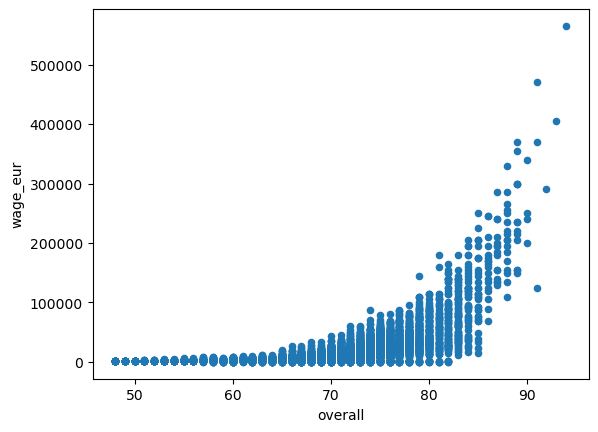

In [63]:
df.plot(kind = 'scatter', x = 'overall', y = 'wage_eur')


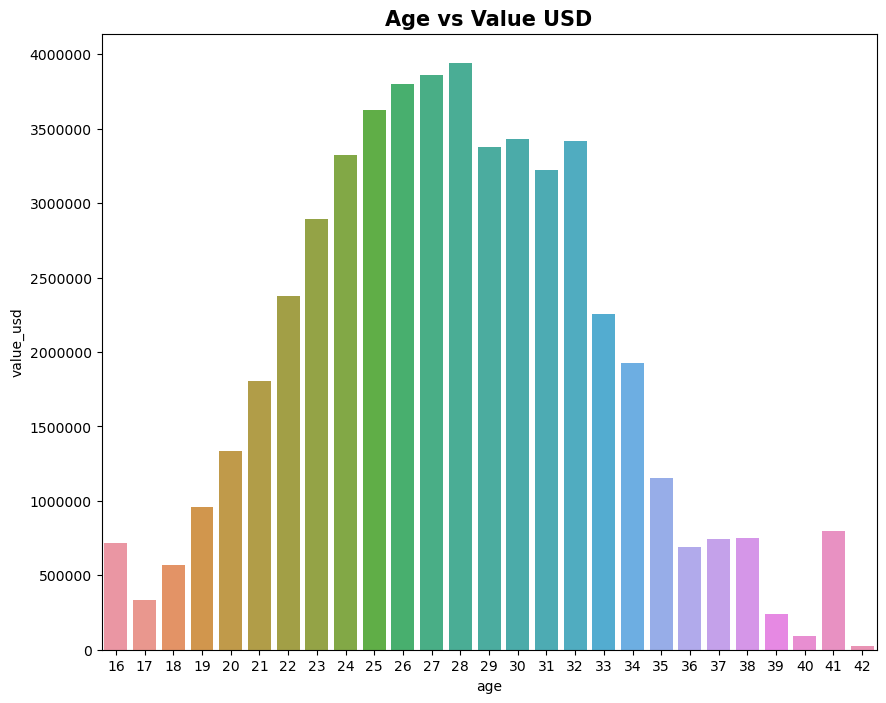

In [64]:
plt.figure(figsize= (10,8))
temp_df = df.groupby("age")["value_usd"].mean().reset_index()
sns.barplot(
    data = temp_df,
    x = "age",
    y = "value_usd"
    
);
plt.title("Age vs Value USD", fontsize = 15, weight = "bold");
plt.ticklabel_format(style='plain', axis='y');

In [65]:
df[["short_name", "age","wage_eur", "nationality"]][df["age"]==41]

,short_name,age,wage_eur,nationality
200,G. Buffon,41,58000,Italy
868,Hilton,41,21000,Brazil
3706,C. Lucchetti,41,5000,Argentina
10665,F. Kippe,41,1000,Norway


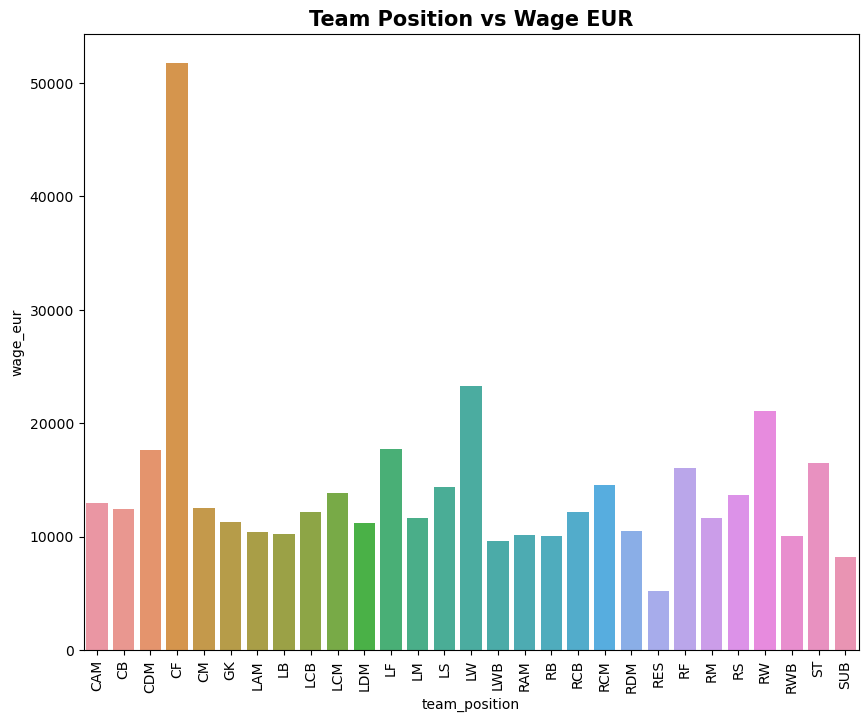

In [66]:
plt.figure(figsize= (10,8))
temp_df = df.groupby("team_position")["wage_eur"].mean().reset_index()
sns.barplot(
    data = temp_df,
    x = "team_position",
    y = "wage_eur"    
)
plt.xticks(rotation= 90);
plt.title("Team Position vs Wage EUR", fontsize = 15, weight = "bold");

In [67]:
temp_df = df.groupby("team_position")["wage_eur"].count()
temp_df

team_position
CAM     311
CB      100
CDM     181
CF       14
CM       76
GK      662
LAM      23
LB      560
LCB     660
LCM     411
LDM     242
LF       19
LM      398
LS      195
LW      162
LWB      58
RAM      23
RB      560
RCB     660
RCM     411
RDM     244
RES    2958
RF       19
RM      399
RS      195
RW      161
RWB      58
ST      458
SUB    7820
Name: wage_eur, dtype: int64

In [68]:
df[["short_name", "team_position", "wage_eur", "value_usd"]][df["team_position"]=="CF"]

,short_name,team_position,wage_eur,value_usd
46,K. Benzema,CF,285000,49050000.0
63,Roberto Firmino,CF,170000,56680000.0
434,J. Correa,CF,53000,21800000.0
651,J. King,CF,77000,15805000.0
741,Dyego Sousa,CF,23000,13625000.0
862,C. Tévez,CF,19000,4905000.0
1410,J. Campbell,CF,32000,9810000.0
1531,Y. Ōsako,CF,30000,8175000.0
2950,Lee Jae Sung,CF,13000,5123000.0
5484,M. Vilhjálmsson,CF,4000,1526000.0


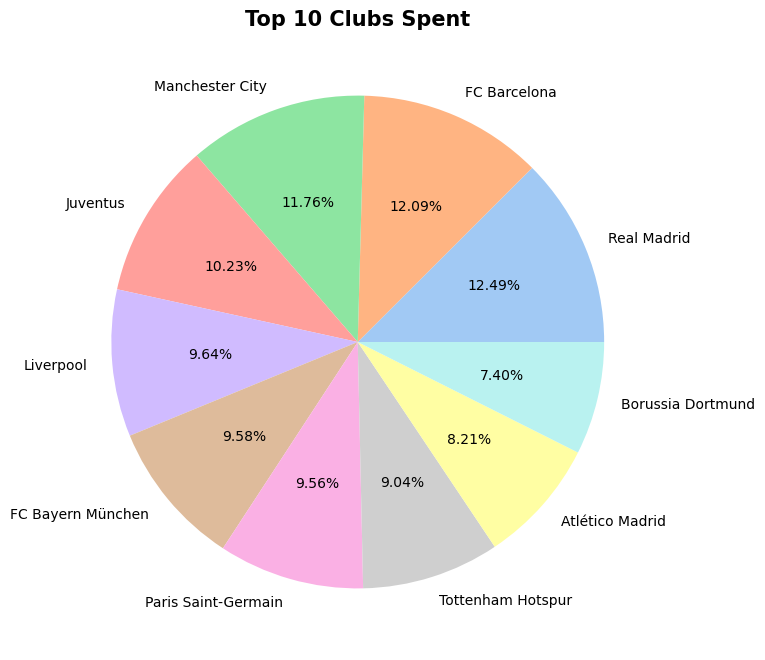

In [69]:
plt.figure(figsize= (10,8))
temp_df = df.groupby("club")["value_usd"].sum().sort_values(ascending = False)[:10].reset_index()

colors = sns.color_palette('pastel')

plt.pie(temp_df["value_usd"], labels = temp_df["club"], colors = colors, autopct='%.2f%%')
plt.title("Top 10 Clubs Spent", fontsize = 15, weight = "bold");

In [70]:
players20_updated = df.to_csv("players20_updated")